In [1]:
"""
Anastasia Pupo
April 2025
CS 5330
Final Project
"""

'\nAnastasia Pupo\nApril 2025\nCS 5330\nFinal Project\n'

In [2]:
"""
Program to train a model
Data is loaded into a tensorflow dataset, data is split amongst training, validation, and test. All images undergo preprocessing.

Code Resources Utilized: 
Potato Leaf classification deep learning project on YouTube by codebasics: https://www.youtube.com/playlist?list=PLeo1K3hjS3utJFNGyBpIvjWgSDY0eOE8S
Dissertation document from creater of 10Knots dataset: https://josephcameron.info/knotclassifier.html
"""

'\nProgram to train a model\nData is loaded into a tensorflow dataset, data is split amongst training, validation, and test. All images undergo preprocessing.\n\nCode Resources Utilized: \nPotato Leaf classification deep learning project on YouTube by codebasics: https://www.youtube.com/playlist?list=PLeo1K3hjS3utJFNGyBpIvjWgSDY0eOE8S\nDissertation document from creater of 10Knots dataset: https://josephcameron.info/knotclassifier.html\n'

In [3]:
#get essential modules

# tensorflow and matplotlib
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# modules for accessing images in directory and resizing of images
from PIL import Image
import os

# module for learning optimizer
from tensorflow.keras.optimizers import Adam

# module for mathematical operations
import numpy as np

In [4]:
# Define constants of image size, batch size, channels, and epochs
IMAGE_SIZE = 256
BATCH_SIZE = 32  # 32 is a standard batch size
CHANNELS = 3
EPOCHS = 50  # set to 100 to compare with owner of the 10Knots' dissertation

In [5]:
"""
Loading and Rezise Preprocessing of 10Knots Dataset
"""

'\nLoading and Rezise Preprocessing of 10Knots Dataset\n'

In [6]:
'''
Method to resize all images if needed.
Return: None
'''
def resize_images(image_database, required_size = (IMAGE_SIZE, IMAGE_SIZE)):
    for curr_directory, sub_directories, image_files in os.walk(image_database):  # go through each image in database
        for image_file in image_files:
            image_path = os.path.join(curr_directory, image_file)
            print(image_file)
            if not image_file.lower().endswith('.jpg'):  # Skips .DS_Store that is not a image
                continue 
            image = Image.open(image_path)
            if image.size != required_size:
                image = image.resize(required_size)
                image.save(image_path)
'''
Uncomment below code if resize needed to call function and notified when resize completed
'''
#resize_images("10Knots")
#print("Done with resizing")

'\nUncomment below code if resize needed to call function and notified when resize completed\n'

In [7]:
'''
Download the images utilizing tensorflow dataset. All images are loaded into a tensor.
'''
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "10Knots",
    shuffle=True,  # randomly shuffle images
    image_size = (IMAGE_SIZE, IMAGE_SIZE),  # specify image size
    batch_size = BATCH_SIZE
)

Found 1440 files belonging to 10 classes.


2025-04-24 00:37:39.910482: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-24 00:37:39.910525: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-24 00:37:39.910550: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-24 00:37:39.910573: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-24 00:37:39.910592: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
'''
Prints out all image classes
'''
class_names = dataset.class_names # get class names
class_names  # print class names

['Alpine Butterfly Knot',
 'Bowline Knot',
 'Clove Hitch',
 'Figure-8 Knot',
 'Figure-8 Loop',
 "Fisherman's Knot",
 'Flemish Bend',
 'Overhand Knot',
 'Reef Knot',
 'Slip Knot']

In [9]:
'''
Confirm if all images have been downloaded by getting the total number of batches and multiplying by batch size. 
Additionally visualization of the data for further confirmation.
'''

'\nConfirm if all images have been downloaded by getting the total number of batches and multiplying by batch size. \nAdditionally visualization of the data for further confirmation.\n'

In [10]:
len(dataset)  # number of batches total

45

In [11]:
45 * 32  # confirm if is 1440, if so then all images in 10Knots dataset has been downloaded

1440

(32, 256, 256, 3)
[8 1 1 3 2 1 2 6 4 4 4 4 2 1 1 6 6 6 1 8 6 6 0 0 2 1 5 2 1 2 6 8]
(256, 256, 3)
[[[153.  63.  10.]
  [154.  64.  11.]
  [154.  64.  11.]
  ...
  [229. 135.  45.]
  [229. 135.  45.]
  [230. 136.  46.]]

 [[153.  63.  10.]
  [153.  63.  10.]
  [153.  63.  10.]
  ...
  [230. 136.  46.]
  [230. 136.  46.]
  [230. 136.  46.]]

 [[153.  63.  10.]
  [153.  63.  10.]
  [153.  63.  10.]
  ...
  [230. 136.  46.]
  [231. 137.  47.]
  [231. 137.  47.]]

 ...

 [[167.  77.  17.]
  [167.  77.  17.]
  [167.  77.  17.]
  ...
  [252. 204. 130.]
  [252. 204. 130.]
  [252. 204. 130.]]

 [[166.  76.  16.]
  [167.  77.  17.]
  [167.  77.  17.]
  ...
  [252. 204. 130.]
  [252. 204. 130.]
  [252. 204. 130.]]

 [[166.  76.  16.]
  [166.  76.  16.]
  [167.  77.  17.]
  ...
  [252. 204. 130.]
  [252. 204. 130.]
  [253. 205. 131.]]]


2025-04-24 00:37:40.313396: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


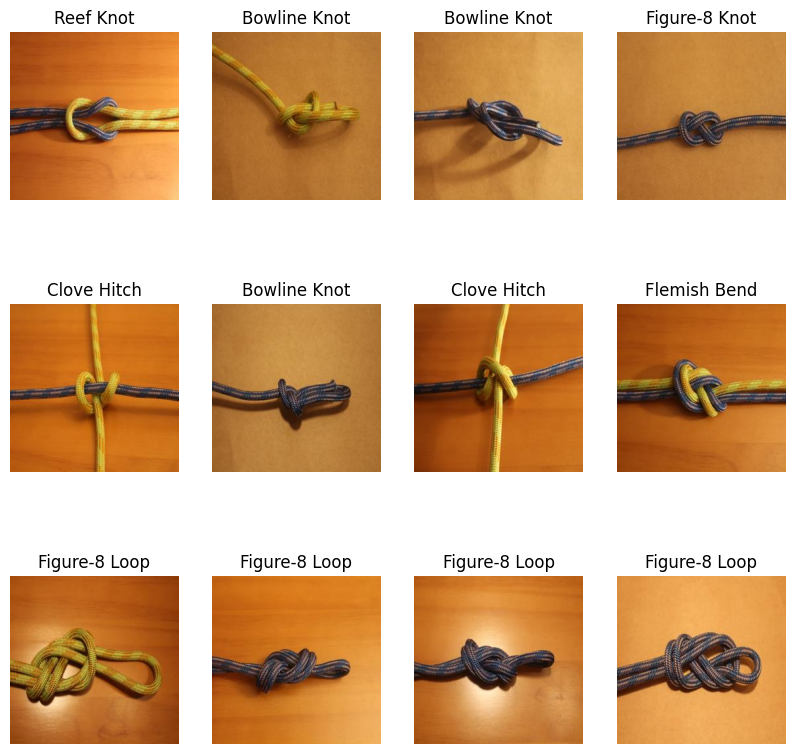

In [12]:
'''
Visualizes some of the data and information about the batch/first image.
'''
plt.figure(figsize=(10,10))  #increases area of plot
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape) # prints 32 images, each 256 x 256, and 3 for RGB
    print(label_batch.numpy()) # every element is tensor so need to convert to numpy
    print(image_batch[0].shape) 
    print(image_batch[0].numpy()) #print first image
    for i in range(12):  #diplay first 12 images
        ax = plt.subplot(3,4,i+1) #need grid to display multiple images
        plt.imshow(image_batch[i].numpy().astype("uint8"))  #imshow expects 3D array
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [13]:
"""
Split the Dataset into:
80% ==> training data
20% ==> 10% validation & 10% test (in remaining 20% of data, 10% even split between validation and test.)
After each epoch, validation is done on the 10% validation dataset
Once done with all epochs, the test dataset is utilized to measure the accuracy of the model
"""

'\nSplit the Dataset into:\n80% ==> training data\n20% ==> 10% validation & 10% test (in remaining 20% of data, 10% even split between validation and test.)\nAfter each epoch, validation is done on the 10% validation dataset\nOnce done with all epochs, the test dataset is utilized to measure the accuracy of the model\n'

In [14]:
'''
Method splits the 10Knot dataset into training, validation, and test dataset.
Split percentages hard-coded into method signature. 80% for train_split, 0.1% for validation_split and 0.1% for test_split
Return: train_dataset, validation_dataset, test_dataset
'''
def partitions_dataset(dataset, train_split=0.8, validation_split=0.1, test_split=0.1, shuffle = True, shuffle_size = 10000):
    dataset_size = len(dataset)

    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)  # same seed gives same result so used for predictability
    
    train_size = int(train_split * dataset_size)  # convert to int so don't get float
    validation_size = int(validation_split * dataset_size)

    train_dataset = dataset.take(train_size)
    validation_dataset = dataset.skip(train_size).take(validation_size)
    test_dataset = dataset.skip(train_size).skip(validation_size)
    
    return train_dataset, validation_dataset, test_dataset

In [15]:
train_dataset, validation_dataset, test_dataset = partitions_dataset(dataset)  # Calls partition_dataset

In [16]:
'''
Verify split was successful through checking lengths of datasets
'''

'\nVerify split was successful through checking lengths of datasets\n'

In [17]:
len(train_dataset)

36

In [18]:
# Take one batch from the dataset
images, labels = next(iter(train_dataset))

# View shape and content of the labels
print("Label shape:", labels.shape)
print("Example label:", labels[0])

Label shape: (32,)
Example label: tf.Tensor(5, shape=(), dtype=int32)


In [19]:
len(test_dataset)

5

In [20]:
len(validation_dataset)

4

In [21]:
"""
Optimize and Preprocess Data
"""

'\nOptimize and Preprocess Data\n'

In [22]:
# Optimizes for training performance in an attempt to speed up training.
# Cache for image read from disk, so that for the next iteration if need the same image will already be in memory & improve performance.
# If gpu is occupied, prefetch will have cpu load next set of batch from disk to further improve performance.
# Tensorflow will determine how many batches to load in prefetch

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
'''
Resizing and Rescaling Image
'''
resize_rescale_layer = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),  # Resize if image not 256x256
    layers.Rescaling(1./255) # Scale image from [0,255] to [0,1]
])

In [24]:
'''
Data Augmentation
Produces different transformations of an image (example horizontal flip, contrast, zoom, rotation) to generate new training samples.
Helpful for small datasets.
Data augmentation layer specified similarly to dissertation document, missing one augmentation so not exactly the same model.
'''

data_augmentation_layer = tf.keras.Sequential([
    #layers.Rescaling(1./255),                      # rescale in case image is not the same size as dataset images model trained on
    layers.RandomRotation(1.0),                    # rotation
    layers.RandomZoom(0.3),                        # zoom
    layers.RandomTranslation(0.2, 0.2),            # width/height shift range
    layers.RandomFlip("horizontal_and_vertical"),  # horizontal & vertical flip
])

In [25]:
"""
Build the convolutional neural network and train using train_dataset.
Measure accuracy using test dataset.
"""

'\nBuild the convolutional neural network and train using train_dataset.\nMeasure accuracy using test dataset.\n'

In [26]:
'''
2 Model Architectures
'''
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10


'''
Model 3
'''
'''
# Model similar to that from dissertation document of the Medium Convolutional Neural Network
model = tf.keras.Sequential([
    layers.Input(shape=input_shape),
    resize_rescale_layer,      # assuming these are defined earlier
    data_augmentation_layer,

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax'),
])
'''

'''
Model 2
'''
# Model similar to that from dissertation document of the Small COnvolutional Neural Network
model = tf.keras.Sequential([
    layers.Input(shape=input_shape),
    resize_rescale_layer,      # assuming these are defined earlier
    data_augmentation_layer,

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax'),
])


'''
Model 1
'''
'''
# Model from youtube codebasics tutorial, varies in classes and data augmentation layer
model = tf.keras.Sequential([
    layers.Input(shape=input_shape),
    resize_rescale_layer,  # first layer to resize and scale image 
    data_augmentation_layer,  # perform data augmentation to generate new samples

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
'''

"\n# Model from youtube codebasics tutorial, varies in classes and data augmentation layer\nmodel = tf.keras.Sequential([\n    layers.Input(shape=input_shape),\n    resize_rescale_layer,  # first layer to resize and scale image \n    data_augmentation_layer,  # perform data augmentation to generate new samples\n\n    layers.Conv2D(32, (3,3), activation='relu'),\n    layers.MaxPooling2D((2,2)),\n    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),\n    layers.MaxPooling2D((2,2)),\n    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),\n    layers.MaxPooling2D((2,2)),\n    layers.Conv2D(64, (3,3), activation='relu'),\n    layers.MaxPooling2D((2,2)),\n    layers.Conv2D(64, (3,3), activation='relu'),\n    layers.MaxPooling2D((2,2)),\n    layers.Conv2D(64, (3,3), activation='relu'),\n    layers.MaxPooling2D((2,2)),\n\n    layers.Flatten(),\n    layers.Dense(64, activation='relu'),\n    layers.Dense(n_classes, activation='softmax'),\n])\n"

In [27]:
# model architecture 
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 122, 122, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 59, 59, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 57, 57, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       294,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 453,194 (1.73 MB)

 Trainable params: 453,194 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
'''
Define optimizer, loss function, and metric
'''
# Compile using optimizers, adam is a famous optimizer. 
# Define loss function
# Accuracy is the metric used to track the training process and gradient descent
model.compile(
    optimizer='adam',  #optimizer=Adam(learning_rate=0.0001),  (if need to adjust rate)
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #changed from SparseCategoricalCrossentrpy
    metrics=['accuracy']
)

In [29]:
'''
Train the network
Record all epochs in history parameter to view training progress.
'''
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1, # print output
    validation_data=validation_dataset # data will be used at each epoch to help track accuracy
)

Epoch 1/50


2025-04-24 00:37:42.974133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


36/36 ━━━━━━━━━━━━━━━━━━━━ 29s 702ms/step - accuracy: 0.1053 - loss: 2.3200 - val_accuracy: 0.0547 - val_loss: 2.3035
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 709ms/step - accuracy: 0.0923 - loss: 2.3036 - val_accuracy: 0.0547 - val_loss: 2.3033
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 22s 612ms/step - accuracy: 0.1158 - loss: 2.3026 - val_accuracy: 0.0547 - val_loss: 2.3039
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 26s 727ms/step - accuracy: 0.1105 - loss: 2.3020 - val_accuracy: 0.0547 - val_loss: 2.3046
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 680ms/step - accuracy: 0.1003 - loss: 2.3019 - val_accuracy: 0.0547 - val_loss: 2.3053
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 26s 732ms/step - accuracy: 0.1097 - loss: 2.3019 - val_accuracy: 0.0547 - val_loss: 2.3052
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 24s 672ms/step - accuracy: 0.1046 - loss: 2.3023 - val_accuracy: 0.0547 - val_loss: 2.3051
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 26s 709ms/step - accuracy: 0.0976 - loss: 2.3021 - val_accuracy: 0.054

In [30]:
"""
Test the model with test_dataset to determine accuracy
"""
scores = model.evaluate(test_dataset)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.1271 - loss: 2.2978


In [31]:
"""
Visualize results
"""

'\nVisualize results\n'

In [32]:
# Get accuracies and losses
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

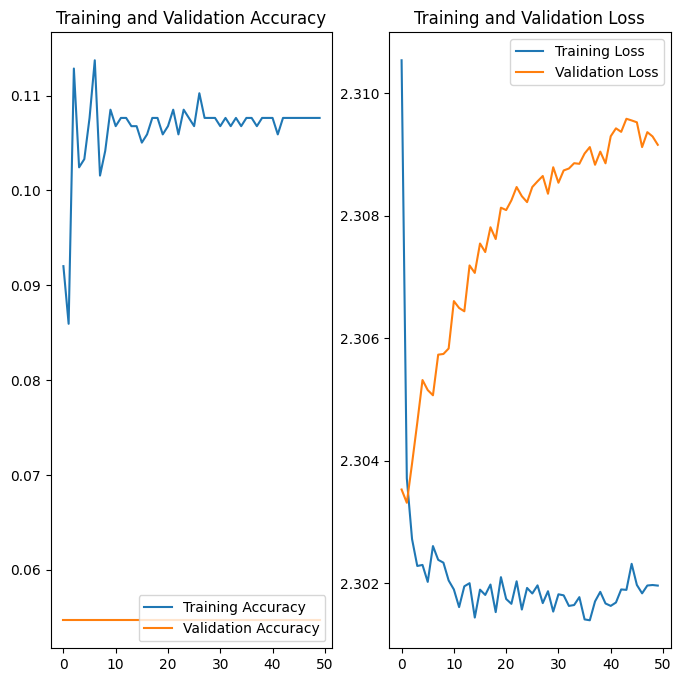

In [33]:
# plot training versus validation accuracy
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),accuracy, label = 'Training Accuracy')
plt.plot(range(EPOCHS),validation_accuracy, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# plot training loss versus validation loss
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label = 'Training Loss')
plt.plot(range(EPOCHS),validation_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
'''
Method utilizes model to predict class of an image.
Returns the predicted class and percent confidence in prediction.
'''
def predict(model, image):
    image_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    image_array = tf.expand_dims(image_array, 0)
    predictions = model.predict(image_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


2025-04-24 01:03:33.228173: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


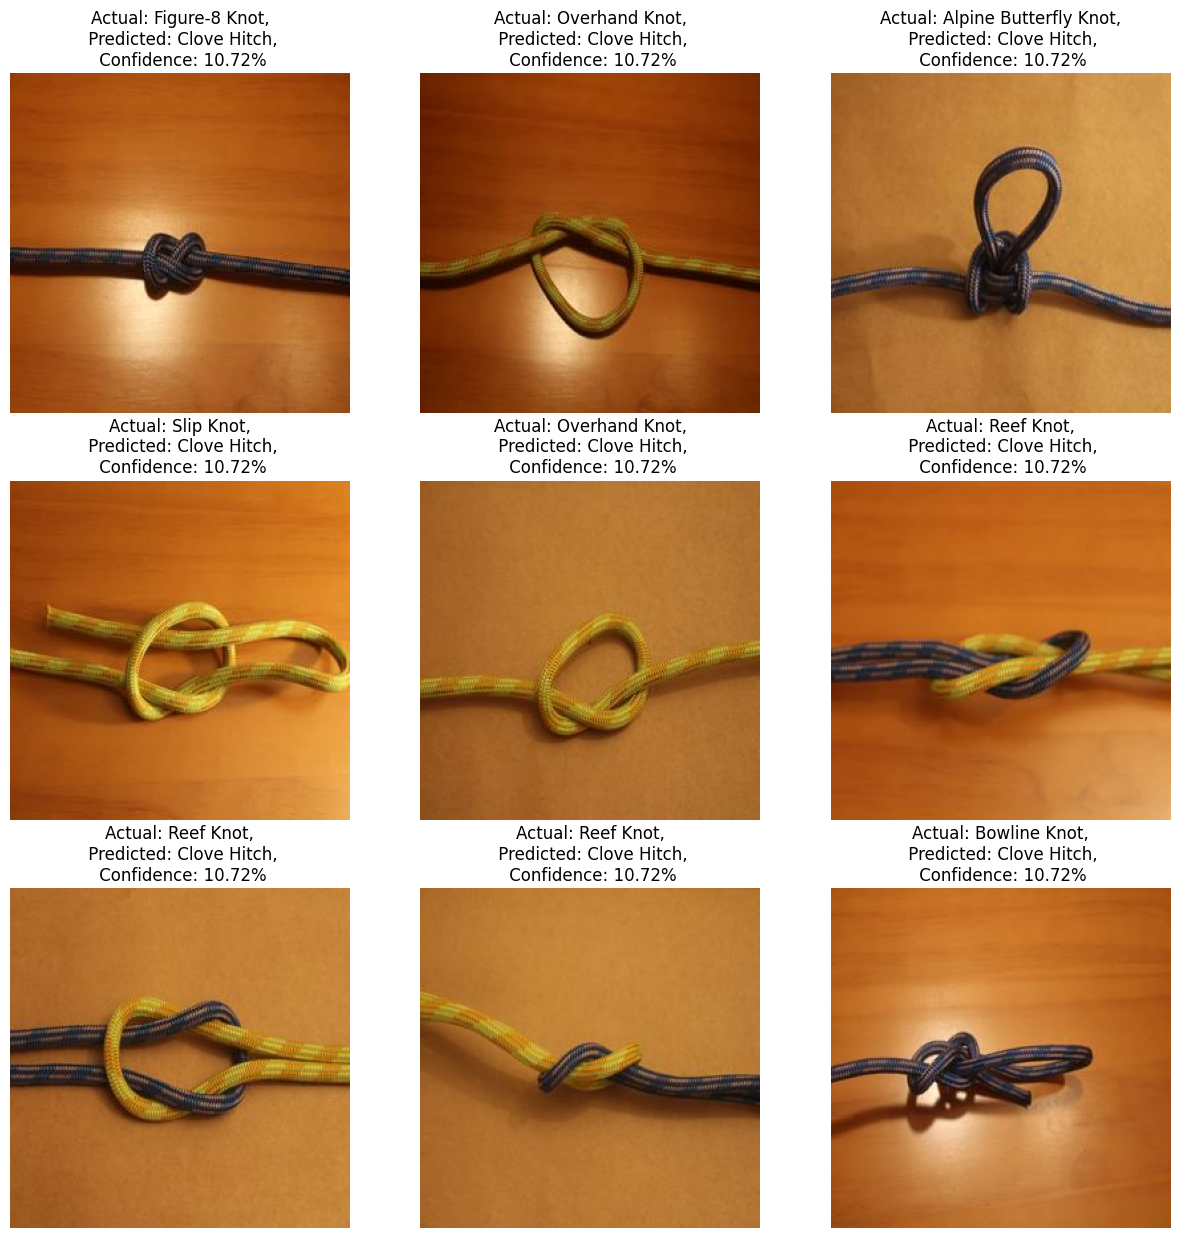

In [35]:
'''
Method calls predict method and displays visualizations of 9 images in dataset along with the actual class, predicted class, and confidence.
'''
plt.figure(figsize=(15,15)) #increase dimension to enlarge images
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
        plt.axis("off")

In [36]:
"""
Save model
Note: Create folder models at destination location before running
"""
model_version = 2
model.save(f"../models/{model_version}.keras")